In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [2]:
# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/dengue_features_train.csv'),
                 pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/dengue_labels_train.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/dengue_features_test.csv')
sample_submission = pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/submission_format.csv')

In [3]:
train, val = train_test_split(train, test_size=len(test),  
                              random_state=42)

In [4]:
sj_train = train.loc[train['city'] == 'sj']
iq_train = train.loc[train['city'] == 'iq']

sj_test = test.loc[test['city'] == 'sj']
iq_test = test.loc[test['city'] == 'iq']

sj_val = val.loc[val['city'] == 'sj']
iq_val = val.loc[val['city'] == 'iq']

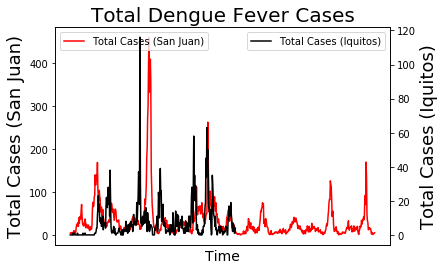

In [5]:
fig, ax = plt.subplots()
sns.lineplot(x='week_start_date', y='total_cases', data=sj_train, ax=ax, color='r', label='Total Cases (San Juan)')
ax2 = ax.twinx()

sns.lineplot(x='week_start_date', y='total_cases', data=iq_train, ax=ax2, color='black', label='Total Cases (Iquitos)')

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Total Cases (San Juan)', fontsize=18)
ax2.set_ylabel('Total Cases (Iquitos)', fontsize=18)
ax2.set_title('Total Dengue Fever Cases', fontsize=20)

ax.legend(loc='upper left')
#ax.legend(["Total Cases (San Juan)"], loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)
#ax2.legend(["Total Cases (Iquitos)"], loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.set_xticks([])
ax = plt.gca()
plt.show();

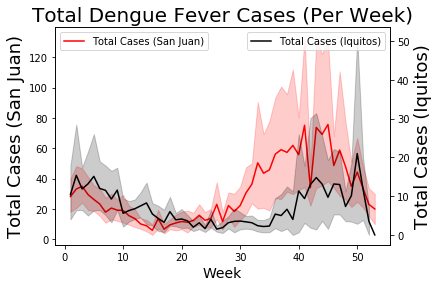

In [6]:
fig, ax = plt.subplots()
sns.lineplot(x='weekofyear', y='total_cases', data=sj_train, ax=ax, color='r', label='Total Cases (San Juan)')
ax2 = ax.twinx()

sns.lineplot(x='weekofyear', y='total_cases', data=iq_train, ax=ax2, color='black', label='Total Cases (Iquitos)')

ax.set_xlabel('Week', fontsize=14)
ax.set_ylabel('Total Cases (San Juan)', fontsize=18)
ax2.set_ylabel('Total Cases (Iquitos)', fontsize=18)
ax2.set_title('Total Dengue Fever Cases (Per Week)', fontsize=20)

ax.legend(loc='upper left')
#ax.legend(["Total Cases (San Juan)"], loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)
#ax2.legend(["Total Cases (Iquitos)"], loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

ax = plt.gca()
plt.show();

In [7]:
## SEASONS - I think seasonality could play into total cases of Dengue because the disease spreads from mosquitos
#            that thrive in hot/wet conditions.

# The climate of Puerto Rico is tropical, hot all year round, with a hot and muggy season from May to October
# and a relatively cool season from December to March, with November and April as intermediate months.

# Peru has two seasons owing to its proximity to the equator. These are not traditionally known as summer and
# winter, but as the rainy/wet season ('summer') which runs from December to March, and the dry season ('winter')
# which runs from May to September.

In [8]:
sj_train['month'] = pd.DatetimeIndex(sj_train['week_start_date']).month
sj_test['month'] = pd.DatetimeIndex(sj_test['week_start_date']).month
sj_val['month'] = pd.DatetimeIndex(sj_val['week_start_date']).month

iq_val['month'] = pd.DatetimeIndex(iq_val['week_start_date']).month
iq_train['month'] = pd.DatetimeIndex(iq_train['week_start_date']).month
iq_test['month'] = pd.DatetimeIndex(iq_test['week_start_date']).month

/home/jack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



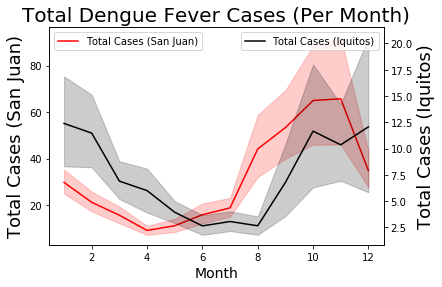

In [9]:
fig, ax = plt.subplots()
sns.lineplot(x='month', y='total_cases', data=sj_train, ax=ax, color='r', label='Total Cases (San Juan)')
ax2 = ax.twinx()

sns.lineplot(x='month', y='total_cases', data=iq_train, ax=ax2, color='black', label='Total Cases (Iquitos)')

ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Total Cases (San Juan)', fontsize=18)
ax2.set_ylabel('Total Cases (Iquitos)', fontsize=18)
ax2.set_title('Total Dengue Fever Cases (Per Month)', fontsize=20)

ax.legend(loc='upper left')
#ax.legend(["Total Cases (San Juan)"], loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)
#ax2.legend(["Total Cases (Iquitos)"], loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

ax = plt.gca()
plt.show();

In [10]:
# hot = 3, cool = 2, intermediate = 1

season = [] 
for value in sj_train["month"]: 
    if value >= 5 and value < 11: 
        season.append(3) 
    elif value == 12 or value <= 3: 
        season.append(2) 
    else: 
        season.append(1) 
       
sj_train["season"] = season    

season = [] 
for value in sj_test["month"]: 
    if value >= 5 and value < 11: 
        season.append(3) 
    elif value == 12 or value <= 3: 
        season.append(2) 
    else: 
        season.append(1) 
       
sj_test["season"] = season    

season = [] 
for value in sj_val["month"]: 
    if value >= 5 and value < 11: 
        season.append(3) 
    elif value == 12 or value <= 3: 
        season.append(2) 
    else: 
        season.append(1) 
       
sj_val["season"] = season     

/home/jack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/jack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [11]:
# Rainy = 2, dry = 1

season = [] 
for value in iq_train["month"]:  
    if value == 12 or value <= 4: 
        season.append(2) 
    else: 
        season.append(1) 
       
iq_train["season"] = season    

season = [] 
for value in iq_test["month"]: 
    if value == 12 or value <= 4: 
        season.append(2) 
    else: 
        season.append(1) 
       
iq_test["season"] = season    

season = [] 
for value in iq_val["month"]: 
    if value == 12 or value <= 4: 
        season.append(2) 
    else: 
        season.append(1) 
       
iq_val["season"] = season  

/home/jack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/jack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [12]:
iq_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month,season
1417,iq,2009,40,2009-10-01,0.206300,0.255257,0.279957,0.206657,57.18,298.034286,...,17.947143,8.514286,27.950000,12.225000,35.2,20.5,33.1,2,10,1
1205,iq,2005,35,2005-09-03,0.456833,0.359583,0.359450,0.380117,12.81,298.184286,...,15.428571,10.942857,26.800000,10.250000,35.2,21.4,37.0,0,9,1
1231,iq,2006,9,2006-03-05,0.178667,0.195933,0.141267,0.128283,79.13,298.252857,...,18.401429,8.028571,27.433333,9.566667,32.9,21.9,26.9,26,3,2
1074,iq,2003,9,2003-02-26,0.297600,0.236633,0.229150,0.207283,132.20,299.350000,...,18.044286,9.114286,29.400000,11.200000,35.0,22.9,0.0,5,2,2
1232,iq,2006,10,2006-03-12,0.424629,0.411300,0.373186,0.315857,94.99,297.925714,...,18.902857,6.414286,28.000000,9.550000,33.3,21.9,93.0,8,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,iq,2002,31,2002-07-30,0.387014,0.260171,0.349271,0.283057,89.93,297.161429,...,16.075714,10.600000,26.700000,11.140000,33.8,19.3,35.6,6,7,1
1095,iq,2003,30,2003-07-23,0.285814,0.163071,0.288029,0.277457,2.64,296.485714,...,13.558571,11.428571,26.466667,10.366667,32.1,18.0,9.9,1,7,1
1130,iq,2004,13,2004-03-25,0.306283,0.198720,0.029880,0.290150,120.10,297.312857,...,18.237143,5.714286,28.650000,9.300000,34.0,23.6,142.6,3,3,2
1294,iq,2007,21,2007-05-21,0.364614,0.256829,0.329900,0.349686,64.11,297.232857,...,17.718571,8.957143,28.250000,10.550000,33.8,21.7,86.6,5,5,1


In [13]:
# SJ - hot/muggy season = YYYY-05-DD through YYYY-10-DD
# SJ - cool season = YYYY-12-DD through YYYY-03-DD
# SJ - intermediate season = YYYY-11-DD AND NOT THROUGH YYYY-04-DD

# IQ - rainy season = YYYY-12-DD through YYYY-03-DD
# IQ - dry season = YYYY-05-DD through YYYY-09-DD

In [14]:
sj_correlations = sj_train.corr()
iq_correlations = iq_train.corr()

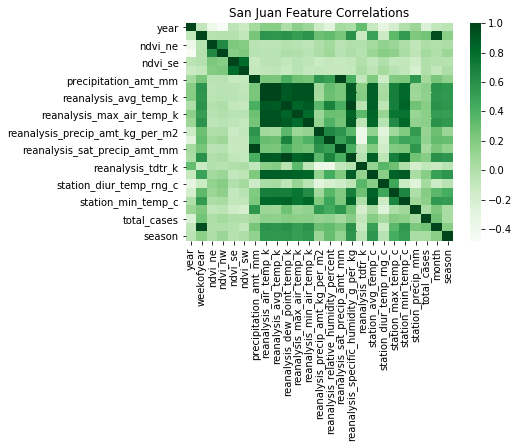

In [15]:
sj_corr_heat = sns.heatmap(sj_correlations, cmap="Greens")
plt.title('San Juan Feature Correlations');

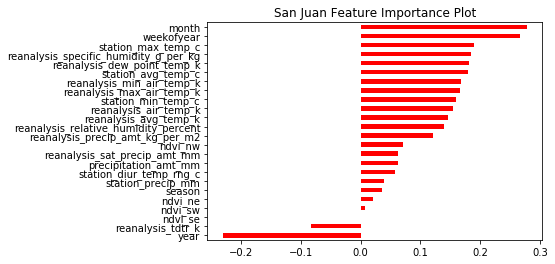

In [16]:
(sj_correlations
     .total_cases
     .drop('total_cases')
     .sort_values(ascending=True)
     .plot
     .barh(title='San Juan Feature Importance Plot',color='red'));

In [ ]:
sj_train = sj_train.drop('year', axis=1)
sj_test = sj_test.drop('year', axis=1)
sj_val = sj_val.drop('year', axis=1)

In [ ]:
sj_train = sj_train.drop('reanalysis_tdtr_k', axis=1)
sj_test = sj_test.drop('reanalysis_tdtr_k', axis=1)
sj_val = sj_val.drop('reanalysis_tdtr_k', axis=1)

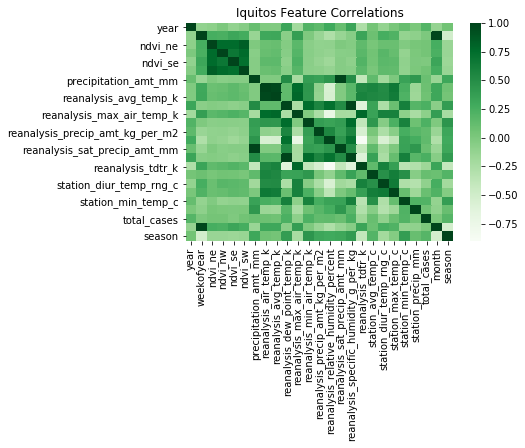

In [17]:
iq_corr_heat = sns.heatmap(iq_correlations, cmap='Greens')
plt.title('Iquitos Feature Correlations');

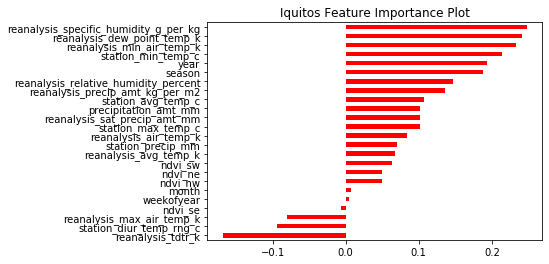

In [18]:
(iq_correlations
     .total_cases
     .drop('total_cases')
     .sort_values(ascending=True)
     .plot
     .barh(title='Iquitos Feature Importance Plot',color='red'));

In [19]:
# Baselines

In [20]:
target = 'total_cases'
sj_features = sj_train.columns.drop([target])
sj_X_train = sj_train[sj_features]
sj_y_train = sj_train[target]
sj_X_val = sj_val[sj_features]
sj_y_val = sj_val[target]

In [21]:
target = 'total_cases'
iq_features = iq_train.columns.drop([target])
iq_X_train = iq_train[iq_features]
iq_y_train = iq_train[target]
iq_X_val = iq_val[iq_features]
iq_y_val = iq_val[target]

In [22]:
sj_y_train_log = np.log1p(sj_y_train)

In [23]:
iq_y_train_log = np.log1p(iq_y_train)

In [24]:
sj_guess = sj_y_train.mean()
sj_y_pred = [sj_guess] * len(sj_y_train)
mae = mean_absolute_error(sj_y_train, sj_y_pred)
print(f'Train Error: {mae:.2f} percentage points')

Train Error: 25.60 percentage points


In [25]:
iq_guess = iq_y_train.mean()
iq_y_pred = [iq_guess] * len(iq_y_train)
mae = mean_absolute_error(iq_y_train, iq_y_pred)
print(f'Train Error: {mae:.2f} percentage points')

Train Error: 7.02 percentage points


In [34]:
# San Juan - Linear Regression Model

sj_pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='most_frequent'), 
    Ridge(normalize=True)
)

# Fit on train, score on val
sj_pipeline.fit(sj_X_train, sj_y_train)
sj_y_pred0 = sj_pipeline.predict(sj_X_val)
print('MAE', mean_absolute_error(sj_y_val, sj_y_pred0))

MAE 29.981467800367987


In [37]:
# Iquitos - Linear Regression Model

iq_pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    Ridge(normalize=True)
)

# Fit on train, score on val
iq_pipeline.fit(iq_X_train, iq_y_train)
iq_y_pred0 = iq_pipeline.predict(iq_X_val)
print('MAE', mean_absolute_error(iq_y_val, iq_y_pred0))

MAE 5.625603385022671


In [40]:
# San Juan - Random Forest Classifier
rf = RandomForestRegressor(random_state = 42)

sj_pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='most_frequent'), 
    RandomForestRegressor(n_jobs=-1, random_state=42)
)

sj_pipeline.fit(sj_X_train, sj_y_train)
sj_y_pred = sj_pipeline.predict(sj_X_val)
print('MAE', mean_absolute_error(sj_y_val, sj_y_pred))

MAE 17.96763358778626


In [38]:
# Iquitos - Random Forest Classifier

iq_pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='most_frequent'), 
    RandomForestRegressor(n_jobs=-1, random_state=42)
)

# Fit on train, score on val
iq_pipeline.fit(iq_X_train, iq_y_train)
iq_y_pred = iq_pipeline.predict(iq_X_val)
print('MAE', mean_absolute_error(iq_y_val, iq_y_pred))

MAE 5.822077922077923


In [56]:
sj_val1 = sj_val

In [70]:
iq_val1 = iq_val

In [61]:
sj_val1['true'] = sj_y_pred.astype(int)

/home/jack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
iq_val1['true'] = iq_y_pred0.astype(int)

/home/jack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


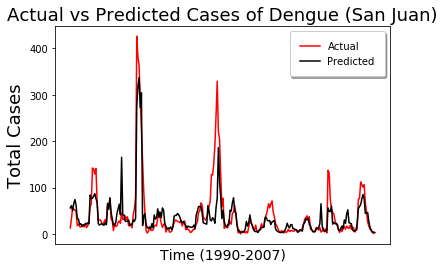

In [85]:
fig, ax = plt.subplots()
sns.lineplot(x='week_start_date', y='total_cases', data=sj_val, ax=ax, color='r', label='Actual')

sns.lineplot(x='week_start_date', y='true', data=sj_val1, ax=ax, color='black', label='Predicted')

ax.set_xlabel('Time (1990-2007)', fontsize=14)
ax.set_ylabel('Total Cases', fontsize=18)
ax.set_title('Actual vs Predicted Cases of Dengue (San Juan)', fontsize=18)

ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
#ax2.legend(["Total Cases (Iquitos)"], loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.set_xticks([])
ax = plt.gca()
plt.show();

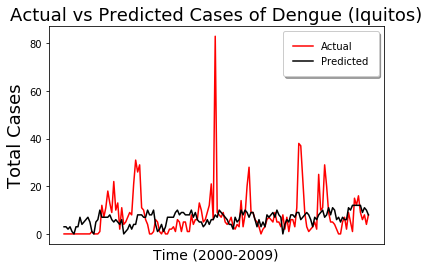

In [87]:
fig, ax = plt.subplots()
sns.lineplot(x='week_start_date', y='total_cases', data=iq_val, ax=ax, color='r', label='Actual')

sns.lineplot(x='week_start_date', y='true', data=iq_val1, ax=ax, color='black', label='Predicted')

ax.set_xlabel('Time (2000-2009)', fontsize=14)
ax.set_ylabel('Total Cases', fontsize=18)
ax.set_title('Actual vs Predicted Cases of Dengue (Iquitos)', fontsize=18)

ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
#ax2.legend(["Total Cases (Iquitos)"], loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.set_xticks([])
ax = plt.gca()
plt.show();